# 12.5 Lab: Unsupervised Learning

## 12.5.1 Principal Components Analysis

In this lab, we perform PCA on the `USArrests` data set, which is part of the base `R` package. 
The rows of the data set contain the 50 states, in alphabetical order.

In [1]:
library("ggplot2")
library("skimr")
library("GGally")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [3]:
skim(USArrests)

── Data Summary ────────────────────────
                           Values   
Name                       USArrests
Number of rows             50       
Number of columns          4        
_______________________             
Column type frequency:              
  numeric                  4        
________________________            
Group variables            None     

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean    sd    p0    p25    p50   p75
1 Murder                0             1   7.79  4.36   0.8   4.08   7.25  11.3
2 Assault               0             1 171.   83.3   45   109    159    249  
3 UrbanPop              0             1  65.5  14.5   32    54.5   66     77.8
4 Rape                  0             1  21.2   9.37   7.3  15.1   20.1   26.2
   p100 hist 
1  17.4 ▇▇▅▅▃
2 337   ▆▇▃▅▃
3  91   ▁▆▇▅▆
4  46   ▆▇▅▂▂


In [4]:
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


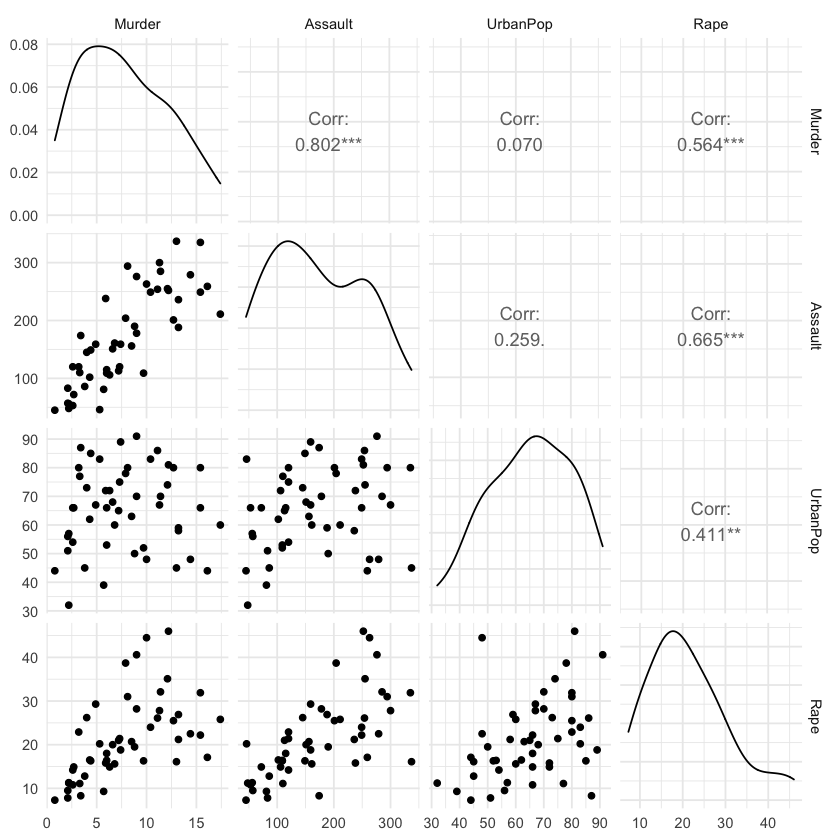

In [5]:
ggpairs(USArrests) + theme_minimal()

In [6]:
states <- row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

The columns of the data set contain the four variables.

In [7]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

We first briefly examine the data. 
We notice that the variables have vastly different means.

In [8]:
print(apply(USArrests, 2, mean))

  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 


Note that the `apply()` function allows us to apply a function—in this case, the `mean()` function—to each row or column of the data set. 
The second input here denotes whether we wish to compute the mean of the rows, 1, or the columns, 2. 
We see that there are on average three times as many rapes as murders, and more than eight times as many assaults as rapes. 
We can also examine the variances of the four variables using the `apply()` function.

In [9]:
print(apply(USArrests, 2, var))

    Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916 


Not surprisingly, the variables also have vastly different variances: the `UrbanPop` variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes in each state per 100000 individuals. 
If we failed to scale the variables before performing PCA, then most of the principal components that we observed would be driven by the `Assault` variable, since it has by far the largest mean and variance. 
Thus, it is important to standardize the variables to have mean zero and standard deviation one before performing PCA.

We now perform principal components analysis using the `prcomp()` function, which is one of several functions in `R` that perform PCA.

In [10]:
pr_out <- prcomp(USArrests, scale = T) # mean zero by default

By default, the `prcomp()` function centers the variables to have mean zero. 
By using the option `scale = TRUE`, we scale the variables to have standard deviation one. 
The output from `prcomp()` contains a number of useful quantities.

In [11]:
names(pr_out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

The `center` and `scale` components correspond to the means and standard deviations of the variables that were used for scaling prior to implementing PCA.

In [12]:
print(pr_out$center) # mean

  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 


In [13]:
print(pr_out$scale) # sd

   Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385 


The `rotation` matrix provides the principal component loadings; each column of `pr.out$rotation` contains the corresponding principal component loading vector. (This function names it the rotation matrix, because when we matrix-multiply the $X$ matrix by `pr.out$rotation`, it gives us the coordinates of the data in the rotated coordinate system. These coordinates are the principal component scores.)

In [14]:
pr_out$rotation # loading vectors in each column

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


We see that there are four distinct principal components. 
This is to be expected because there are in general $min(n − 1, p)$ informative principal components in a data set with $n$ observations and $p$ variables.

Using the `prcomp()` function, we do not need to explicitly multiply the data by the principal component loading vectors in order to obtain the principal component score vectors. 
Rather the $50\times 4$ matrix `x` has as its columns the principal component score vectors. 
That is, the $k$-th column is the $k$-th principal component score vector.

In [15]:
dim(pr_out$x) # principal component score vectors

[1] 50  4

We can plot the first two principal components as follows:

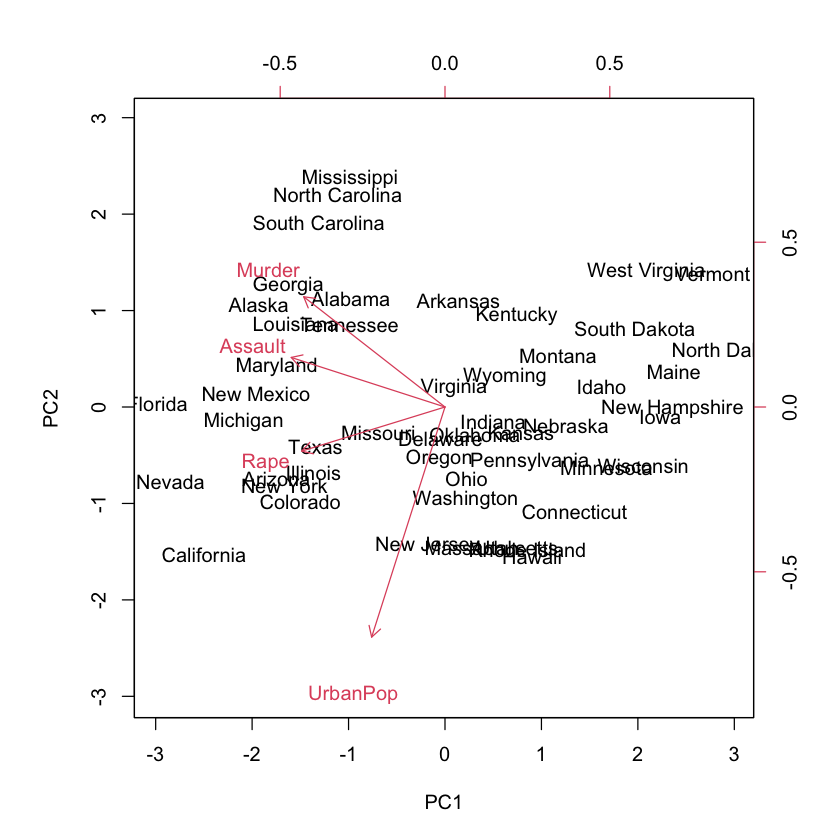

In [16]:
biplot(pr_out, scale = 0)

The `scale = 0` argument to `biplot()` ensures that the arrows are scaled to represent the loadings; other values for `scale` give slightly different biplots with different interpretations.

Notice that this figure is a mirror image of Figure 12.1. 
Recall that the principal components are only unique up to a sign change, so we can reproduce Figure 12.1 by making a few small changes:

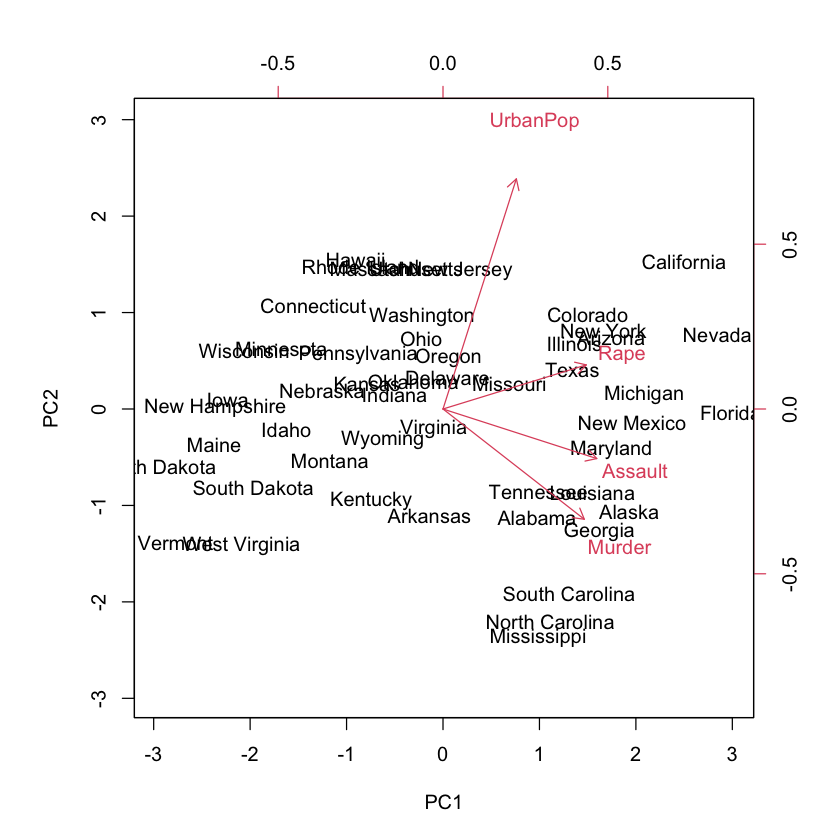

In [17]:
pr_out$rotation <- - pr_out$rotation
pr_out$x <- - pr_out$x
biplot(pr_out, scale = 0)

The `prcomp()` function also outputs the standard deviation of each principal component. 
For instance, on the `USArrests` data set, we can access these standard deviations as follows:

In [18]:
pr_out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

The variance explained by each principal component is obtained by squaring these:

In [19]:
pr_var <- pr_out$sdev^2 # variance explained

In [20]:
pr_var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

To compute the proportion of variance explained by each principal component, we simply divide the variance explained by each principal component by the total variance explained by all four principal components:

In [21]:
pve <- pr_var / sum(pr_var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

We see that the first principal component explains 62.0% of the variance in the data, the next principal component explains 24.7% of the variance, and so forth. 
We can plot the PVE explained by each component, as well as the cumulative PVE, as follows:

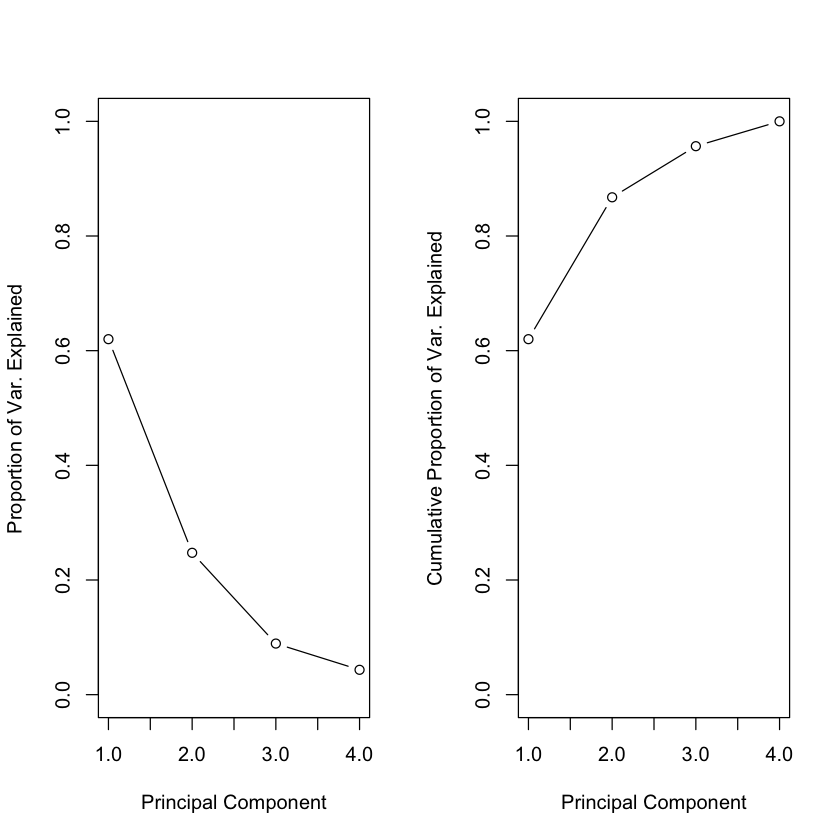

In [22]:
par(mfrow = c(1, 2))
plot(
    pve,
    xlab = "Principal Component",
    ylab = "Proportion of Var. Explained",
    ylim = c(0, 1),
    type = "b"
)
plot(
    cumsum(pve),
    xlab = "Principal Component",
    ylab = "Cumulative Proportion of Var. Explained",
    ylim = c(0, 1),
    type = "b"
)

The result is shown in Figure 12.3. 
Note that the function `cumsum()` computes the cumulative sum of the elements of a numeric vector.
For instance:

## 12.5.2 Matrix Completion

We now re-create the analysis carried out on the `USArrests` data in Section 12.3. 
We turn the data frame into a matrix, after centering and scaling each column to have mean zero and variance one.

In [23]:
X <- data.matrix(scale(USArrests))
pcob <- prcomp(X)

summary(pcob)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

We see that the first principal component explains 62% of the variance. 
We saw in Section 12.2.2 that solving the optimization problem (12.6) on a centered data matrix $X$ is equivalent to computing the first $M$ principal components of the data. 
The *singular value decomposition* (SVD) is a general algorithm for solving (12.6).

In [24]:
svd_X <- svd(X)
names(svd_X)

[1] "d" "u" "v"

In [25]:
round(svd_X$v, 3)

-0.536,0.418,-0.341,0.649
-0.583,0.188,-0.268,-0.743
-0.278,-0.873,-0.378,0.134
-0.543,-0.167,0.818,0.089


The `svd()` function returns three components, `u`, `d`, and `v`. 
The matrix `v` is equivalent to the loading matrix from principal components (`pr_out$rotation`, up to an unimportant sign flip).

In [26]:
pcob$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


The matrix `u` is equivalent to the matrix of *standardized* scores, and the standard deviations are in the vector `d`. We can recover the score vectors using the output of `svd()`. 
They are identical to the score vectors output by `prcomp()`.

In [27]:
t(svd_X$d * t(svd_X$u))

-0.97566045,1.12200121,-0.43980366,0.154696581
-1.93053788,1.06242692,2.01950027,-0.434175454
-1.74544285,-0.73845954,0.05423025,-0.826264240
0.13999894,1.10854226,0.11342217,-0.180973554
-2.49861285,-1.52742672,0.59254100,-0.338559240
-1.49934074,-0.97762966,1.08400162,0.001450164
1.34499236,-1.07798362,-0.63679250,-0.117278736
-0.04722981,-0.32208890,-0.71141032,-0.873113315
-2.98275967,0.03883425,-0.57103206,-0.095317042
-1.62280742,1.26608838,-0.33901818,1.065974459
0.90348448,-1.55467609,0.05027151,0.893733198


In [28]:
pcob$x

,PC1,PC2,PC3,PC4
Alabama,-0.97566045,1.12200121,-0.43980366,0.154696581
Alaska,-1.93053788,1.06242692,2.01950027,-0.434175454
Arizona,-1.74544285,-0.73845954,0.05423025,-0.826264240
Arkansas,0.13999894,1.10854226,0.11342217,-0.180973554
California,-2.49861285,-1.52742672,0.59254100,-0.338559240
Colorado,-1.49934074,-0.97762966,1.08400162,0.001450164
Connecticut,1.34499236,-1.07798362,-0.63679250,-0.117278736
Delaware,-0.04722981,-0.32208890,-0.71141032,-0.873113315
Florida,-2.98275967,0.03883425,-0.57103206,-0.095317042
Georgia,-1.62280742,1.26608838,-0.33901818,1.065974459


While it would be possible to carry out this lab using the `prcomp()` function, here we use the `svd()` function in order to illustrate its use.

We now omit 20 entries in the $50\times 2$ data matrix at random. 
We do so by first selecting 20 rows (states) at random, and then selecting one of the four entries in each row at random. 
This ensures that every row has at least three observed values.

In [29]:
num_omit <- 20
set.seed(15)
ina <- sample(seq(50), num_omit)
inb <- sample(1:4, num_omit, replace = T)
Xna <- X
index_na <- cbind(ina, inb)
Xna[index_na] <- NA

Here, `ina` contains 20 integers from 1 to 50; this represents the states that are selected to contain missing values. 
And `inb` contains 20 integers from 1 to 4, representing the features that contain the missing values for each of the selected states. 
To perform the final indexing, we create `index.na`, a two-column matrix whose columns are `ina` and `inb`. 
We have indexed a matrix with a matrix of indices!

We now write some code to implement Algorithm 12.1. 
We first write a function that takes in a matrix, and returns an approximation to the matrix using the `svd()` function. 
This will be needed in Step 2 of Algorithm 12.1. 
As mentioned earlier, we could do this using the `prcomp()` function, but instead we use the `svd()` function for illustration.

In [30]:
fit_svd <- function(X, M = 1) {
    svd_ob <- svd(X)
    with(svd_ob,
        u[, 1:M, drop = F] %*%
        (d[1:M] * t(v[, 1:M, drop = F]))
    )
}

Here, we did not bother to explicitly call the `return()` function to return a value from `fit_svd()`; however, the computed quantity is automatically returned by `R`. 
We use the `with()` function to make it a little easier to index the elements of `svd_ob`. 
As an alternative to using `with()`, we could have written

```r
 svd_ob$u[, 1:M, drop = FALSE] %*% (svd_ob$d[1:M] * t(svd_ob$v[, 1:M, drop = FALSE]))
```

inside the `fit_svd()` function.

To conduct Step 1 of the algorithm, we initialize `Xhat` — this is $\hat{X}$ in Algorithm 12.1 — by replacing the missing values with the column means of the non-missing entries.

In [31]:
Xhat <- Xna
xbar <- colMeans(Xna, na.rm = T)
Xhat[index_na] <- xbar[inb]

Before we begin Step 2, we set ourselves up to measure the progress of our iterations:

In [32]:
thresh <- 1e-7
rel_err <- 1
iter <- 0
ismiss <- is.na(Xna)
mssold <- mean((scale(Xna, xbar, FALSE)[!ismiss])^2)
mss0 <- mean(Xna[!ismiss]^2)

Here `ismiss` is a new logical matrix with the same dimensions as `Xna`; a given element equals `TRUE` if the corresponding matrix element is missing. 
This is useful because it allows us to access both the missing and non-missing entries. 
We store the mean of the squared non-missing elements in `mss0`. 
We store the mean squared error of the non-missing elements of the old version of `Xhat` in `mssold`. 
We plan to store the mean squared error of the non-missing elements of the current version of `Xhat` in `mss`, and will then iterate Step 2 of Algorithm 12.1 until the relative error, defined as `(mssold - mss) / mss0`, falls below `thresh = 1e-7`.
Algorithm 12.1 tells us to iterate Step 2 until (12.14) is no longer decreasing. 
Determining whether (12.14) is decreasing requires us only to keep track of `mssold - mss`.

In Step 2(a) of Algorithm 12.1, we approximate `Xhat` using `fit_svd()`; we call this `Xapp`. 
In Step 2(b), we use `Xapp` to update the estimates for elements in `Xhat` that are missing in `Xna`. 
Finally, in Step 2(c), we compute the relative error. 
These three steps are contained in this `while()` loop:

In [33]:
while (rel_err > thresh) {
    iter <- iter + 1
    # Step 2(a)
    Xapp <- fit_svd(Xhat, M = 1)
    # Step 2(b)
    Xhat[ismiss] <- Xapp[ismiss]
    # Step 2(c)
    mss <- mean(((Xna - Xapp)[!ismiss])^2)
    rel_err <- (mssold - mss) / mss0
    mssold <- mss
    cat(
        "Iter:", iter, "; ",
        "MSS:", mss, "; ",
        "Rel. Err.:", rel_err, "\n"
        )
}

Iter: 1 ;  MSS: 0.3821695 ;  Rel. Err.: 0.6194004 
Iter: 2 ;  MSS: 0.3705046 ;  Rel. Err.: 0.01161265 
Iter: 3 ;  MSS: 0.3692779 ;  Rel. Err.: 0.001221144 
Iter: 4 ;  MSS: 0.3691229 ;  Rel. Err.: 0.0001543015 
Iter: 5 ;  MSS: 0.3691008 ;  Rel. Err.: 2.199233e-05 
Iter: 6 ;  MSS: 0.3690974 ;  Rel. Err.: 3.376005e-06 
Iter: 7 ;  MSS: 0.3690969 ;  Rel. Err.: 5.465067e-07 
Iter: 8 ;  MSS: 0.3690968 ;  Rel. Err.: 9.253082e-08 


We see that after eight iterations, the relative error has fallen below `thresh = 1e-7`, and so the algorithm terminates. 
When this happens, the mean squared error of the non-missing elements equals 0.369.
Finally, we compute the correlation between the 20 imputed values and the actual values:

In [34]:
cor(Xapp[ismiss], X[ismiss])

[1] 0.6535043

In this lab, we implemented Algorithm 12.1 ourselves for didactic purposes. 
However, a reader who wishes to apply matrix completion to their data should use the `softImpute` package on `CRAN`, which provides a very efficient implementation of a generalization of this algorithm.

## 12.5.3 Clustering

### K-Means Clustering

The function `kmeans()` performs K-means clustering in `R`. 
We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

In [35]:
set.seed(2)
X <- matrix(rnorm(50 * 2), ncol = 2)
X[1:25, 1] <- X[1:25, 1] + 3
X[1:25, 2] <- X[1:25, 2] + 4

We now perform K-means clustering with `K = 2`.

In [36]:
km_out <- kmeans(X, 2, nstart = 20)

The cluster assignments of the 50 observations are contained in `km_out$cluster`.

In [37]:
km_out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `kmeans()`. 
We can plot the data, with each observation colored according to its cluster assignment.


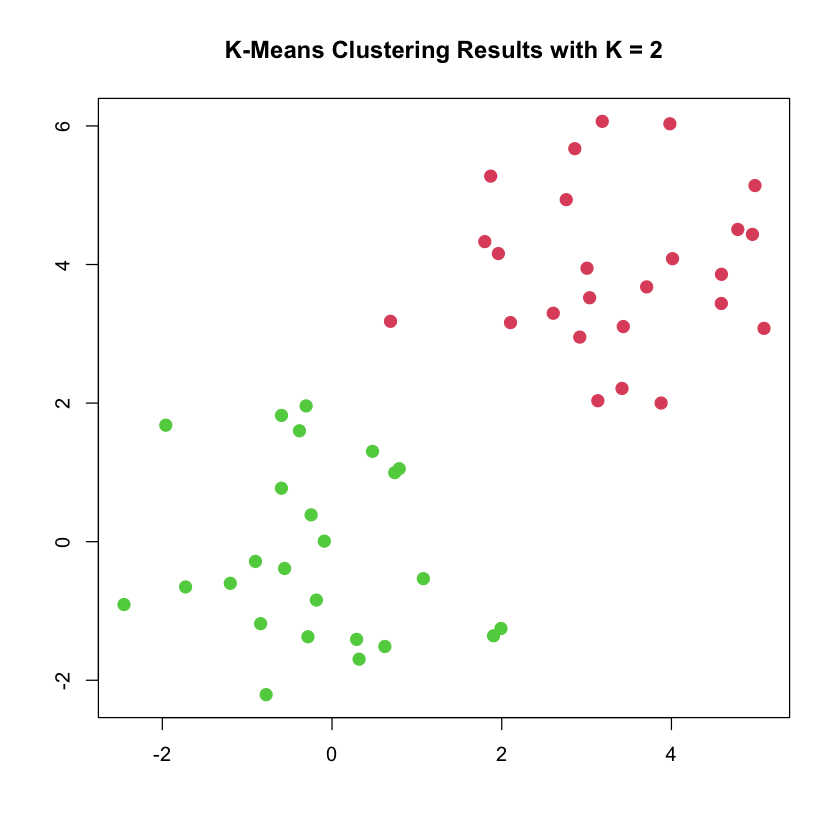

In [38]:
plot(
    X,
    col = km_out$cluster + 1,
    main = "K-Means Clustering Results with K = 2",
    xlab = "",
    ylab = "",
    pch = 20,
    cex = 2
)

Here the observations can be easily plotted because they are two-dimensional. 
If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.
In this example, we knew that there really were two clusters because we generated the data. 
However, for real data, in general we do not know the true number of clusters. 
We could instead have performed K-means clustering on this example with `K = 3`.

In [39]:
set.seed(4)
km_out <- kmeans(X, 3, nstart = 20)
km_out

K-means clustering with 3 clusters of sizes 10, 16, 24

Cluster means:
        [,1]      [,2]
1 -0.1389594  1.475354
2 -0.1758700 -1.012217
3  3.4441838  3.954801

Clustering vector:
 [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 2 1 1 1 2 1 2 2 2 2 1 2 2
[39] 2 1 1 1 2 2 2 2 1 2 2 2

Within cluster sum of squares by cluster:
[1] 11.96953 26.98215 55.34189
 (between_SS / total_SS =  81.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

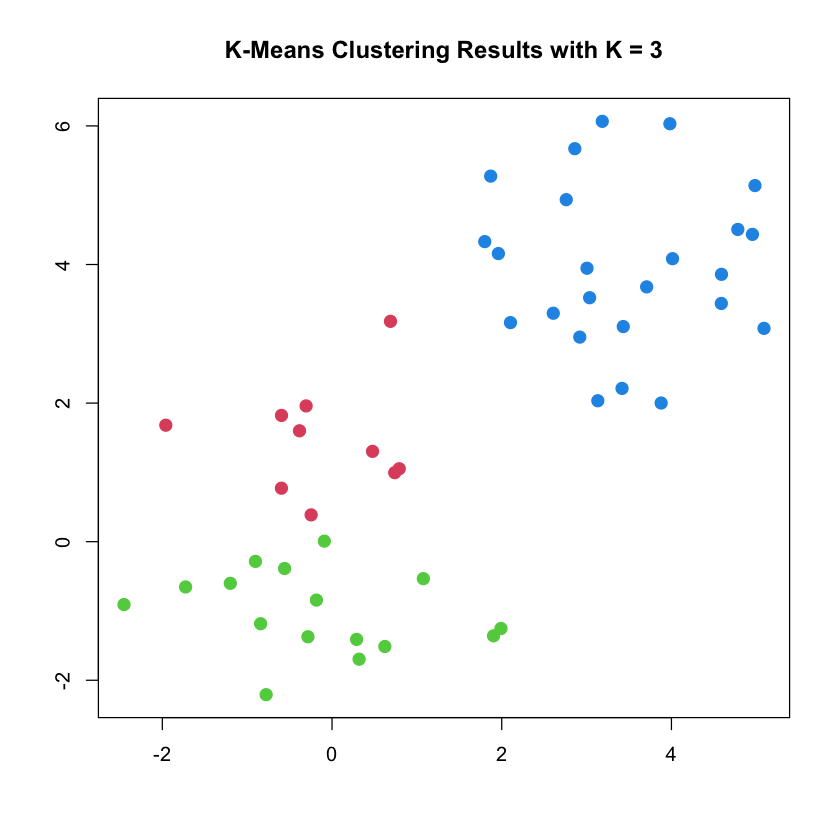

In [40]:
plot(
    X,
    col = km_out$cluster + 1,
    main = "K-Means Clustering Results with K = 3",
    xlab = "",
    ylab = "",
    pch = 20,
    cex = 2
)

When `K = 3`, K-means clustering splits up the two clusters.

To run the `kmeans()` function in `R` with multiple initial cluster assignments, we use the `nstart` argument. 
If a value of `nstart` greater than one is used, then K-means clustering will be performed using multiple random assignments in Step 1 of Algorithm 12.2, and the `kmeans()` function will report only the best results. 
Here we compare using `nstart = 1` to `nstart = 20`.

In [44]:
set.seed(4)
km_out <- kmeans(X, 3, nstart = 1)
km_out$tot.withinss

[1] 104.3319

In [45]:
km_out <- kmeans(X, 3, nstart = 20)
km_out$tot.withinss

[1] 94.29357

Note that `km_out$tot.withinss` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering (Equation 12.17). 
The individual within-cluster sum-of-squares are contained in the vector `km_out$withinss`.

We *strongly* recommend always running K-means clustering with a large value of `nstart`, such as 20 or 50, since otherwise an undesirable local optimum may be obtained.

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the `set.seed()` function. 
This way, the initial cluster assignments in Step 1 can be replicated, and the K-means output will be fully reproducible.

### Hierarchical Clustering

The `hclust()` function implements hierarchical clustering in `R`. 
In the following example we use the data from the previous lab to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. 
We begin by clustering observations using complete linkage. 
The `dist()` function is used to compute the $50\times 50$ inter-observation Euclidean distance matrix.

In [46]:
hc_complete <- hclust(dist(X), method = "complete")

We could just as easily perform hierarchical clustering with average or single linkage instead:

In [47]:
hc_average <- hclust(dist(X), method = "average")
hc_single <- hclust(dist(X), method = "single")

We can now plot the dendrograms obtained using the usual `plot()` function. 
The numbers at the bottom of the plot identify each observation.

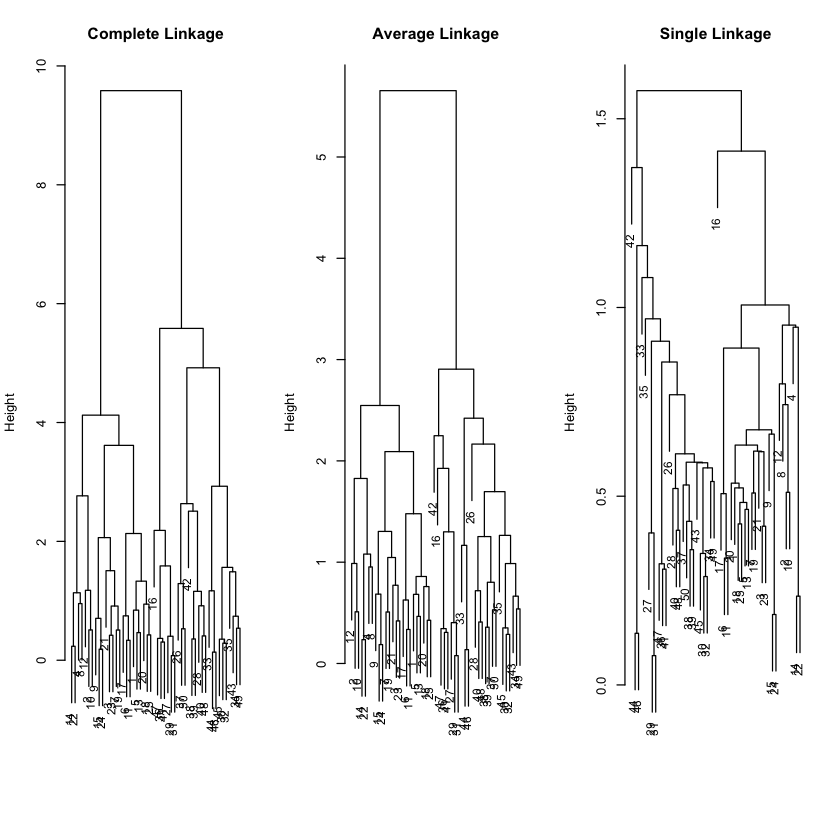

In [48]:
par(mfrow = c(1, 3))
plot(hc_complete, main = "Complete Linkage", xlab = "", sub = "", cex = 0.9)
plot(hc_average, main = "Average Linkage", xlab = "", sub = "", cex = 0.9)
plot(hc_single, main = "Single Linkage", xlab = "", sub = "", cex = 0.9)

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the `cutree()` function:

In [55]:
cutree(hc_complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [54]:
cutree(hc_average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [53]:
cutree(hc_single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The second argument to `cutree()` is the number of clusters we wish to obtain. 
For this data, single, complete and average linkage generally separate the observations into their correct groups. 
**(From the book the results are different: However, single linkage identifies one point as belonging to its own cluster. A more sensible answer is obtained when four clusters are selected, although there are still two singletons.)**

In [52]:
cutree(hc_single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

To scale the variables before performing hierarchical clustering of the observations, we use the `scale()` function:

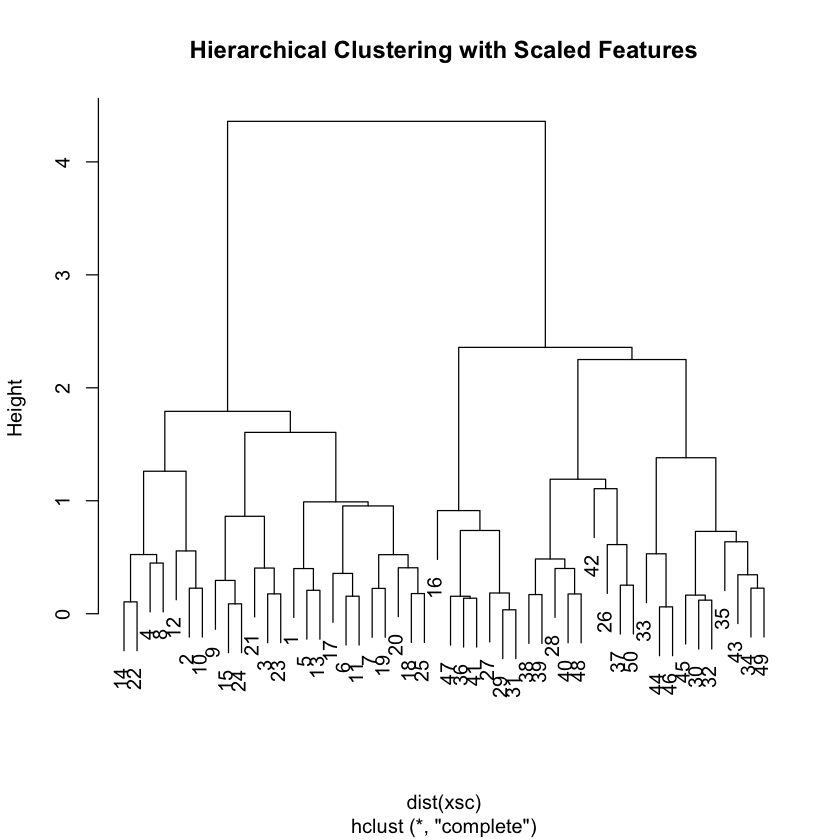

In [56]:
xsc <- scale(X)
plot(
    hclust(dist(xsc), method = "complete"),
    main = "Hierarchical Clustering with Scaled Features"
)

Correlation-based distance can be computed using the `as.dist()` function which converts an arbitrary square symmetric matrix into a form that the `hclust()` function recognizes as a distance matrix. 
However, this only makes sense for data with at least three features since the absolute correlation between any two observations with measurements on two features is always 1. 
Hence, we will cluster a three-dimensional data set. 
This data set does not contain any true clusters.

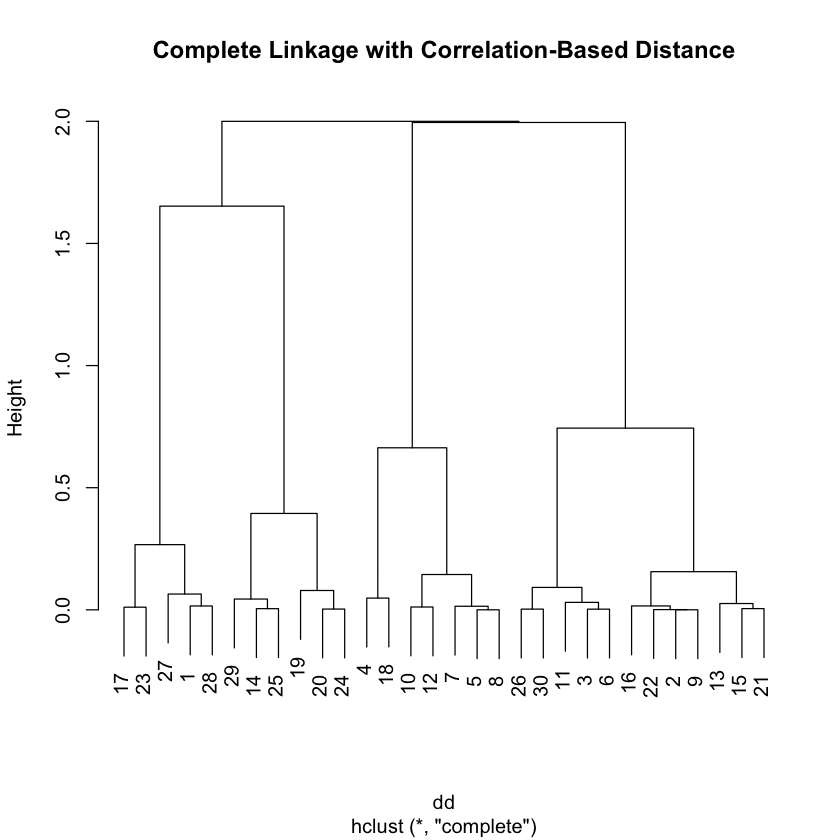

In [57]:
X <- matrix(rnorm(30 * 3), ncol = 3)
dd <- as.dist(1 - cor(t(X)))
plot(
    hclust(dd, method = "complete"),
    main = "Complete Linkage with Correlation-Based Distance"
)

## 12.5.4 NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. 
In particular, PCA and hierarchical clustering are popular tools. 
We illustrate these techniques on the `NCI60` cancer cell line microarray data, which consists of 6830 gene expression measurements on 64 cancer cell lines.

In [58]:
library(ISLR2)

In [59]:
nci_labs <- NCI60$labs
nci_data <- NCI60$data

Each cell line is labeled with a cancer type, given in `nci_labs`. 
We do not make use of the cancer types in performing PCA and clustering, as these are unsupervised techniques. 
But after performing PCA and clustering, we will check to see the extent to which these cancer types agree with the results of these unsupervised techniques.

The data has 64 rows and 6830 columns.

In [60]:
dim(nci_data)

[1]   64 6830

In [63]:
length(nci_labs)

[1] 64

We begin by examining the cancer types for the cell lines.

In [61]:
nci_labs[1:4]

[1] "CNS"   "CNS"   "CNS"   "RENAL"

In [62]:
table(nci_labs)

nci_labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

## PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes) to have standard deviation one, although one could reasonably argue that it is better not to scale the genes.

In [64]:
pr_out <- prcomp(nci_data, scale = T)

We now plot the first few principal component score vectors, in order to visualize the data. 
The observations (cell lines) corresponding to a given cancer type will be plotted in the same color, so that we can see to what extent the observations within a cancer type are similar to each other. 
We first create a simple function that assigns a distinct color to each element of a numeric vector. 
The function will be used to assign a color to each of the 64 cell lines, based on the cancer type to which it corresponds.

In [66]:
Cols <- function(vec) {
    cols <- rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

Note that the `rainbow()` function takes as its argument a positive integer, and returns a vector containing that number of distinct colors.
We now can plot the principal component score vectors.

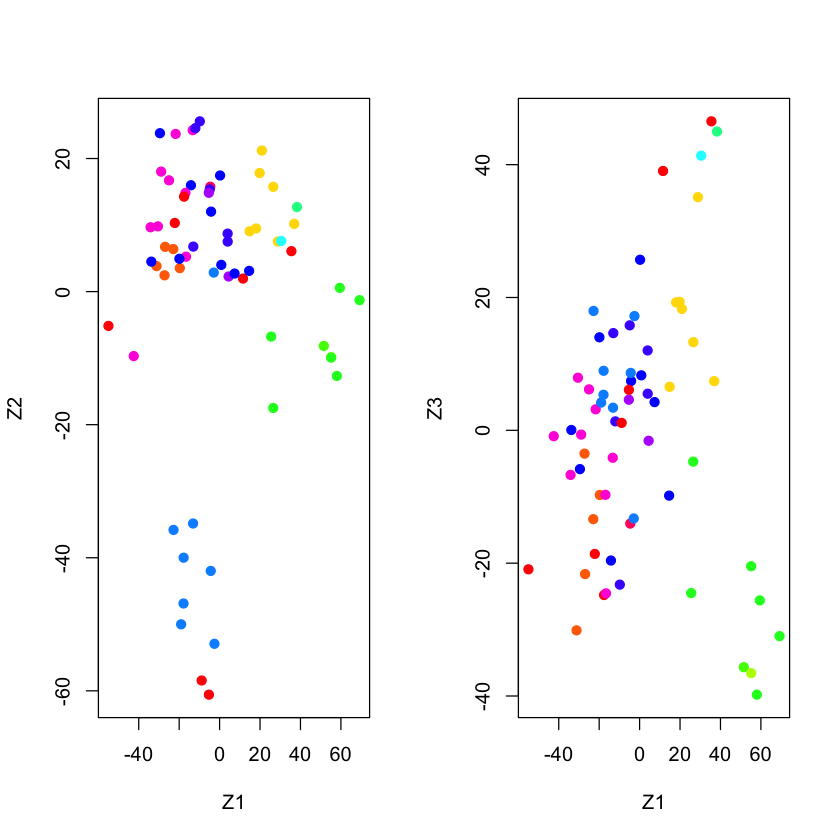

In [68]:
par(mfrow = c(1, 2))
plot(
    pr_out$x[, 1:2],
    col = Cols(nci_labs),
    pch = 19,
    xlab = "Z1",
    ylab = "Z2"
)
plot(
    pr_out$x[, c(1, 3)],
    col = Cols(nci_labs),
    pch = 19,
    xlab = "Z1",
    ylab = "Z3"
)

The resulting plots are shown in Figure 12.17. 
On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the first few principal component score vectors. 
This indicates that cell lines from the same cancer type tend to have pretty similar gene expression levels.
We can obtain a summary of the proportion of variance explained (PVE) of the first few principal components using the `summary()` method for a `prcomp` object (we have truncated the printout):

In [69]:
summary(pr_out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

Using the `plot()` function, we can also plot the variance explained by the first few principal components.

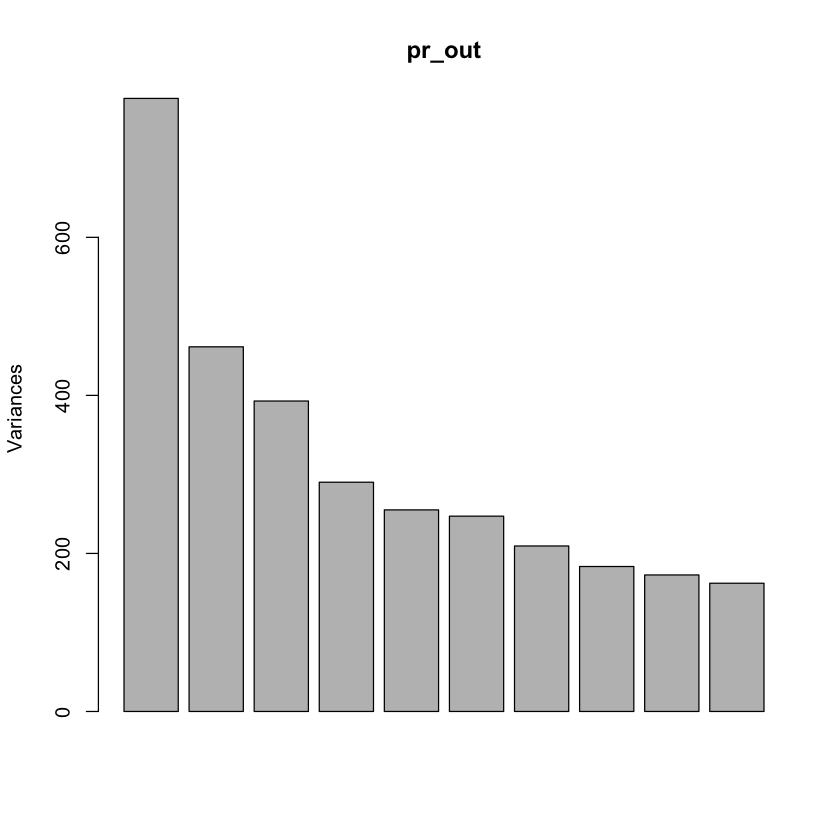

In [70]:
plot(pr_out)

Note that the height of each bar in the bar plot is given by squaring the corresponding element of `pr_out$sdev`. However, it is more informative to plot the PVE of each principal component (i.e. a scree plot) and the cumulative PVE of each principal component. 
This can be done with just a little work.

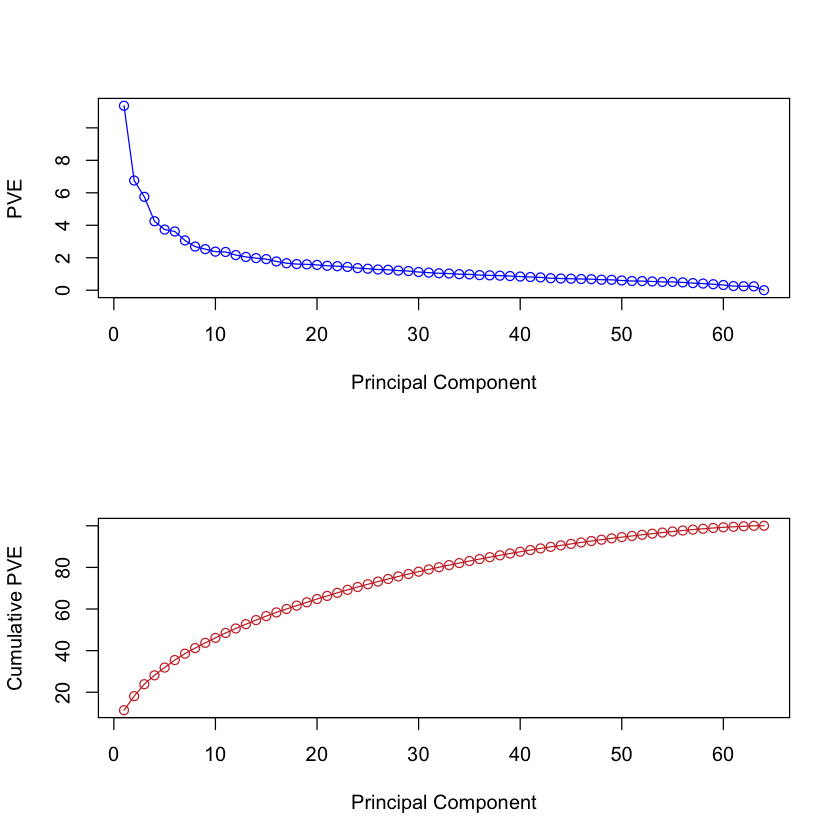

In [72]:
pve <- 100 * pr_out$sdev^2 / sum(pr_out$sdev^2)

par(mfrow = c(2, 1))
plot(
    pve,
    type = "o",
    ylab = "PVE",
    xlab = "Principal Component",
    col = "blue"
)
plot(
    cumsum(pve),
    type = "o",
    ylab = "Cumulative PVE",
    xlab = "Principal Component",
    col = "brown3"
)

(Note that the elements of `pve` can also be computed directly from the summary, `summary(pr_out)$importance[2, ]`, and the elements of `cumsum(pve)` are given by `summary(pr_out)$importance[3, ]`.) 
The resulting plots are shown in Figure 12.18. 
We see that together, the first seven principal components explain around 40% of the variance in the data. 
This is not a huge amount of the variance. 
However, looking at the scree plot, we see that while each of the first seven principal components explain a substantial amount of variance, there is a marked decrease in the variance explained by further principal components. That is, there is an elbow in the plot after approximately the seventh principal component. 
This suggests that there may be little benefit to examining more than seven or so principal components (though even examining seven principal components may be difficult).

### Clustering the Observations of the NCI60 Data

We now proceed to hierarchically cluster the cell lines in the `NCI60` data, with the goal of finding out whether or not the observations cluster into distinct types of cancer. 
To begin, we standardize the variables to have mean zero and standard deviation one. 
As mentioned earlier, this step is optional and should be performed only if we want each gene to be on the same *scale*.

In [73]:
sd_data <- scale(nci_data)

We now perform hierarchical clustering of the observations using complete, single, and average linkage. 
Euclidean distance is used as the dissimilarity measure.

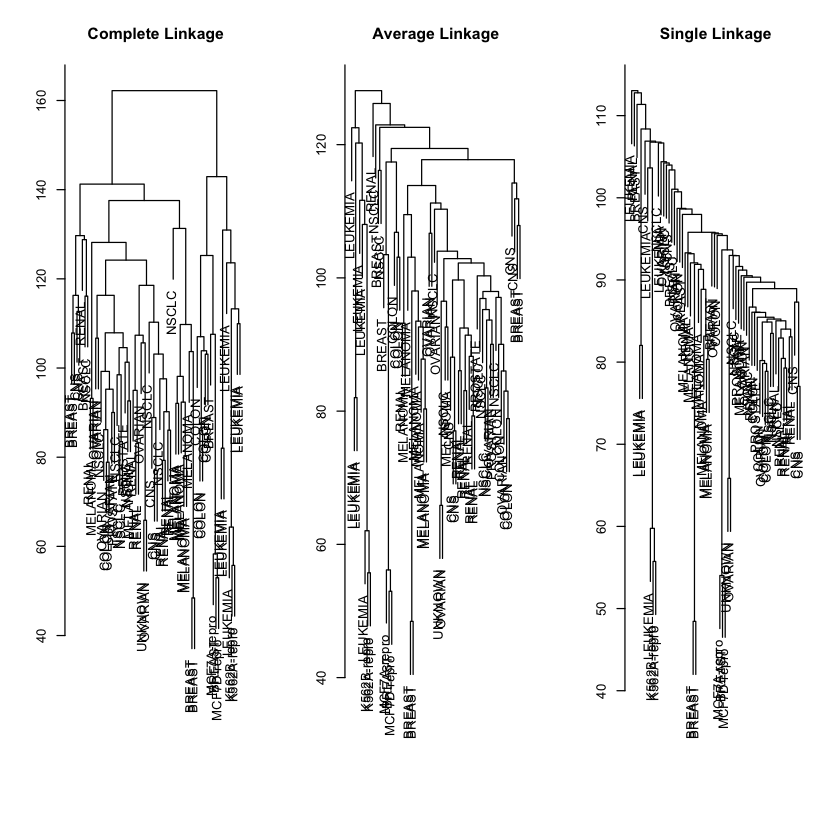

In [84]:
par(mfrow = c(1, 3))
data_dist <- dist(sd_data)
plot(hclust(data_dist),
     xlab = "", sub = "", ylab = "",
     labels = nci_labs,
     main = "Complete Linkage")
plot(hclust(data_dist, method = "average"),
     labels = nci_labs,
     main = "Average Linkage",
     xlab = "", sub = "", ylab = "")
plot(hclust(data_dist, method = "single"),
     labels = nci_labs,
     main = "Single Linkage",
     xlab = "", sub = "", ylab = "")

We see that the choice of linkage certainly does affect the results obtained. 
Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. 
On the other hand, complete and average linkage tend to yield more balanced, attractive clusters. 
For this reason, complete and average linkage are generally preferred to single linkage. 
Clearly cell lines within a single cancer type do tend to cluster together, although the clustering is not perfect. We will use complete linkage hierarchical clustering for the analysis that follows.

We can cut the dendrogram at the height that will yield a particular number of clusters, say four:

In [81]:
hc_out <- hclust(dist(sd_data))
hc_clusters <- cutree(hc_out, 4)
table(hc_clusters, nci_labs)

           nci_labs
hc_clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci_labs
hc_clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

There are some clear patterns. 
All the leukemia cell lines fall in cluster 3, while the breast cancer cell lines are spread out over three different clusters. 
We can plot the cut on the dendrogram that produces these four clusters:

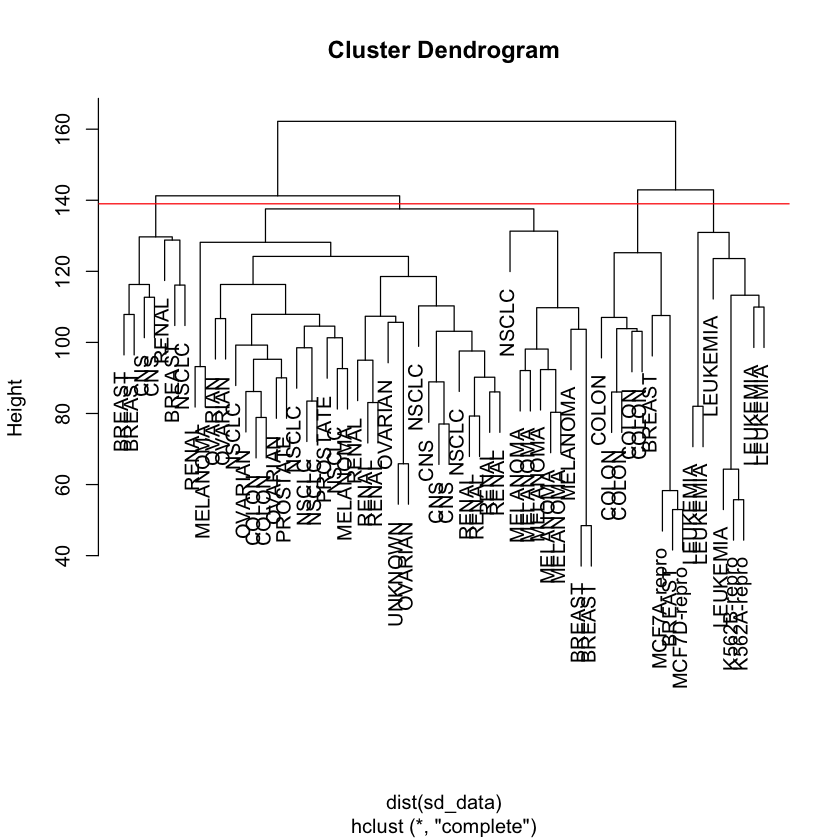

In [82]:
plot(hc_out, labels = nci_labs)
abline(h = 139, col = "red")

The `abline()` function draws a straight line on top of any existing plot in `R`. 
The argument `h = 139` plots a horizontal line at height 139 on the dendrogram; this is the height that results in four distinct clusters. 
It is easy to verify that the resulting clusters are the same as the ones we obtained using `cutree(hc_out, 4)`.

Printing the output of `hclust` gives a useful brief summary of the object:

In [85]:
hr_out


Call:
hclust(d = dist(sd_data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


We claimed earlier in Section 12.4.2 that K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield very different results. 
How do these `NCI60` hierarchical clustering results compare to what we get if we perform K-means clustering with `K = 4`?

In [86]:
set.seed(2)
km_out <- kmeans(sd_data, 4, nstart = 20)
km_clusters <- km_out$cluster
table(km_clusters, hc_clusters)

           hc_clusters
km_clusters  1  2  3  4
          1  0  0  8  0
          2 11  0  0  9
          3 20  7  0  0
          4  9  0  0  0

We see that the four clusters obtained using hierarchical clustering and K-means clustering are somewhat different. Cluster 4 in K-means clustering is identical to cluster 4 in hierarchical clustering. However, the other clusters differ: for instance, cluster 3 in K-means clustering contains a portion of the observations assigned to cluster 1 by hierarchical clustering, as well as all of the observations assigned to cluster 2 by hierarchical clustering.

Rather than performing hierarchical clustering on the entire data matrix, we can simply perform hierarchical clustering on the first few principal component score vectors, as follows:

   nci_labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci_labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

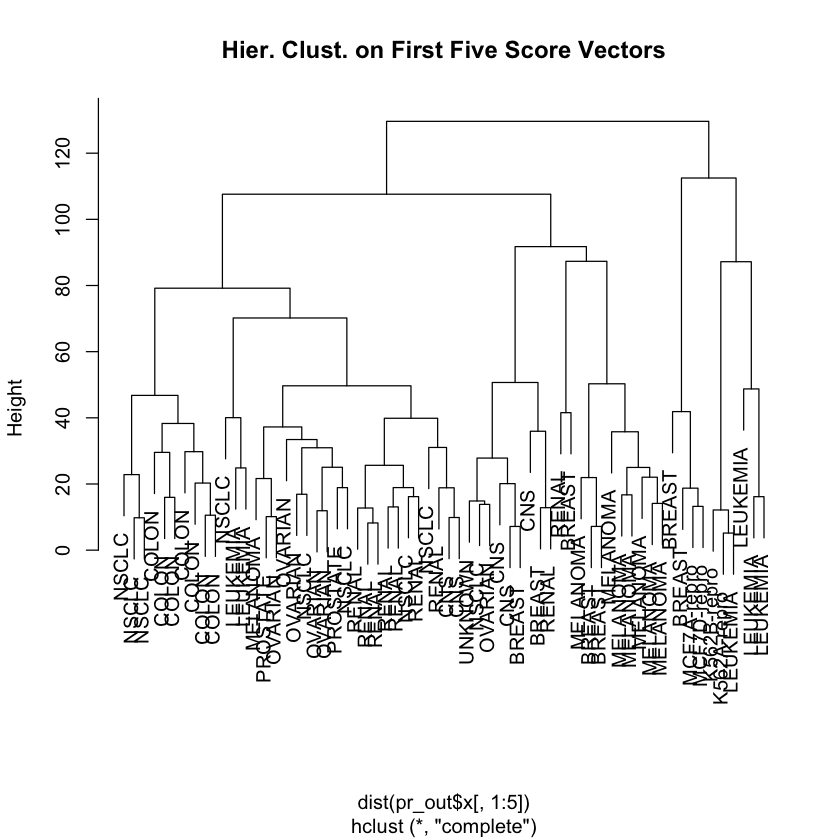

In [88]:
hc_out <- hclust(dist(pr_out$x[, 1:5]))
plot(hc_out, labels = nci_labs, main = "Hier. Clust. on First Five Score Vectors")
table(cutree(hc_out, 4), nci_labs)

Not surprisingly, these results are different from the ones that we obtained when we performed hierarchical clustering on the full data set. 
Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. 
In this situation, we might view the principal component step as one of denoising the data. 
We could also perform K-means clustering on the first few principal component score vectors rather than the full data set.